In [23]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [2]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

              ds             y
0     2016-11-08    709.848022
1     2016-11-09    723.273010
2     2016-11-10    715.533997
3     2016-11-11    716.411011
4     2016-11-12    705.054016
...          ...           ...
1822  2021-11-04  61452.230469
1823  2021-11-05  61125.675781
1824  2021-11-06  61527.480469
1825  2021-11-07           NaN
1826  2021-11-08  65331.031250

[1827 rows x 2 columns]


In [3]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2016-11-08
1    2016-11-09
2    2016-11-10
3    2016-11-11
4    2016-11-12
...         ...
2187 2022-11-04
2188 2022-11-05
2189 2022-11-06
2190 2022-11-07
2191 2022-11-08

[2192 rows x 1 columns]


In [5]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
1992,2022-04-23,79595.433878,72587.152268,86251.961259
1993,2022-04-24,79645.503400,72863.397429,86505.446862
1994,2022-04-25,79813.158462,72956.262864,86608.848043
1995,2022-04-26,79866.836142,73122.582808,86726.659344
1996,2022-04-27,79998.950311,73821.235939,86546.906279
...,...,...,...,...
2187,2022-11-04,94524.041585,83760.035194,105363.156545
2188,2022-11-05,94552.334229,84232.949587,105410.224328
2189,2022-11-06,94554.115714,83601.379329,105818.996030
2190,2022-11-07,94677.500081,84106.862141,105245.548350


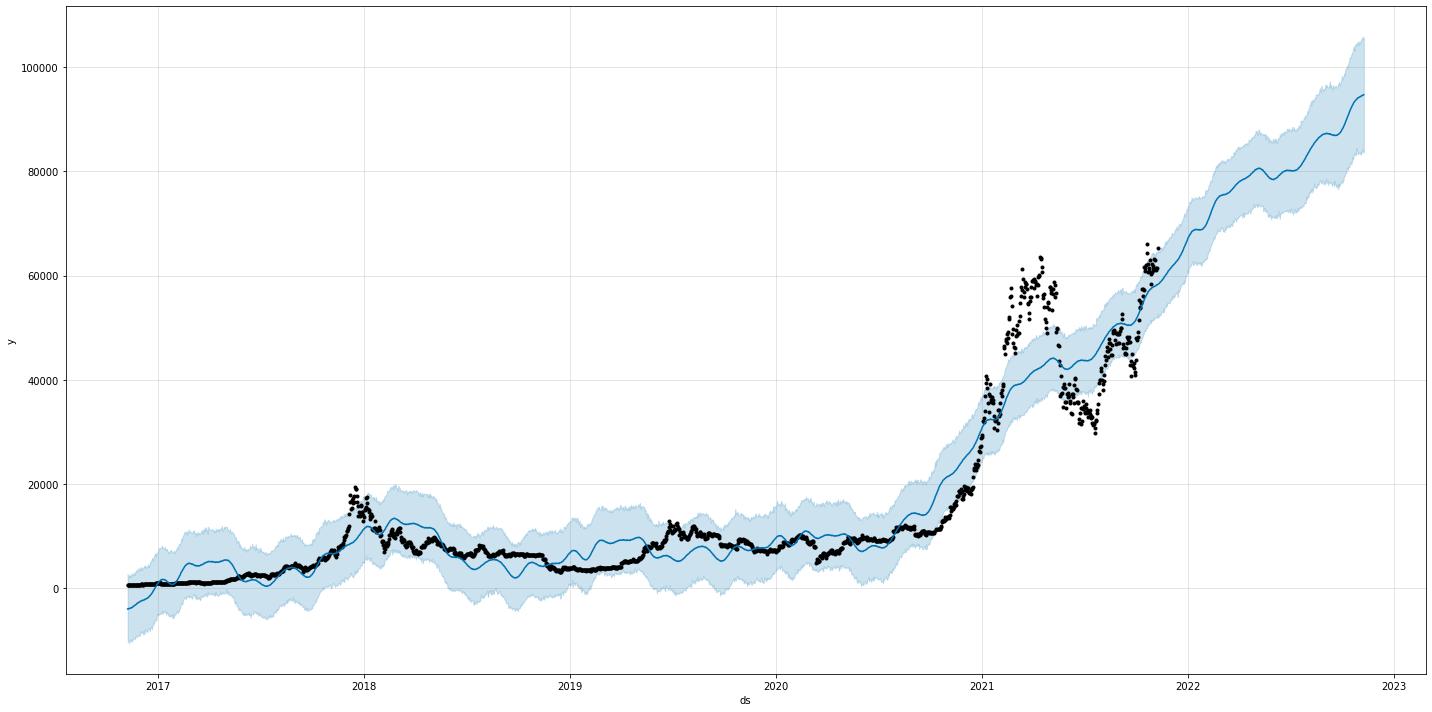

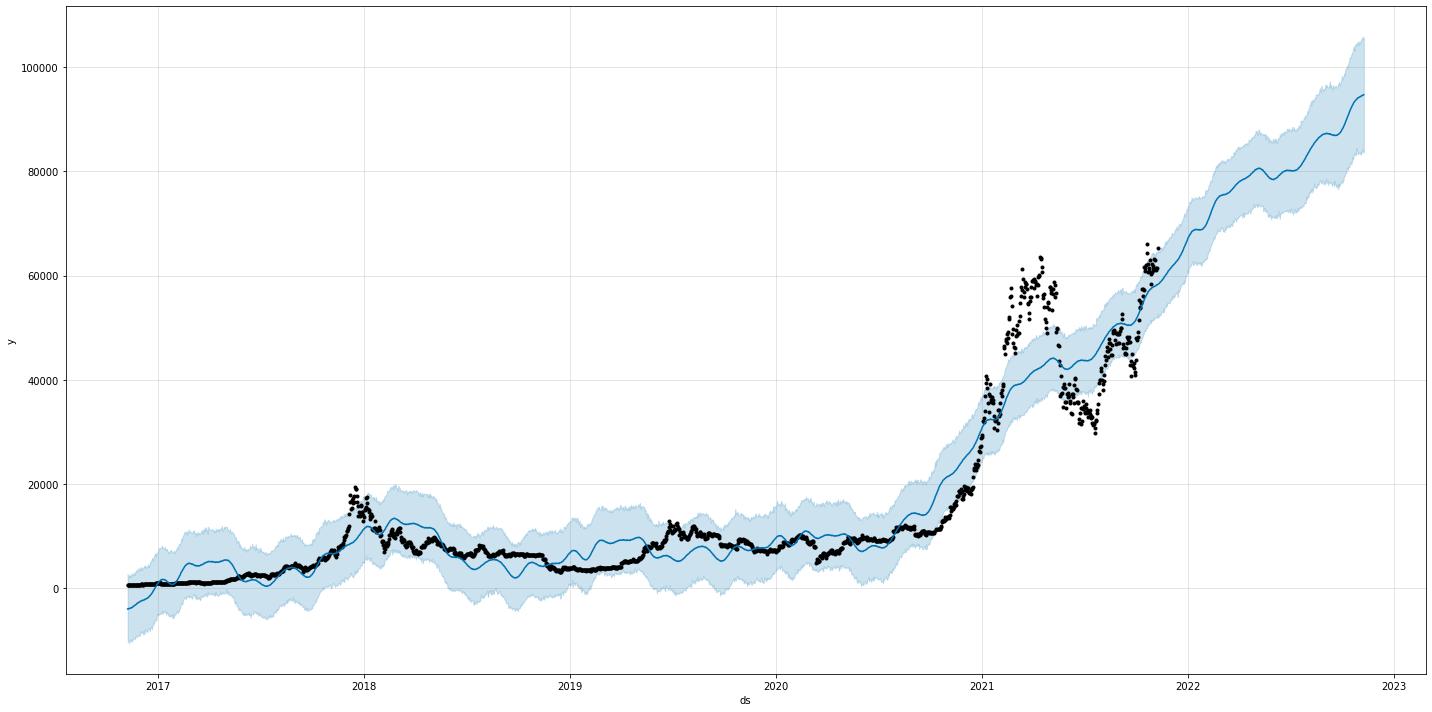

In [6]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set = pd.read_csv("Trainingset.csv")
dataset_train = pd.read_csv("Trainingset.csv")
training_set = training_set.iloc[:,1:2].values
print(training_set)


[[  430.721008]
 [  434.622009]
 [  433.578003]
 ...
 [27081.81055 ]
 [27360.08984 ]
 [28841.57422 ]]


In [17]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
X_train = []
y_train = []

for i in range(90,training_set_scaled.size):
    X_train.append(training_set_scaled[i-90:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])

In [36]:
X_test = []
y_test = []

for i in range(90,training_set_scaled.size,20):
    X_test.append(training_set_scaled[i-90:i, 0])
    y_test.append(training_set_scaled[i, 0])
X_test, y_test = np.array(X_train), np.array(y_train)

** Sequential Nural network Model **

In [29]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [31]:
regressor.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
55/55 [==============================] - 20s 214ms/step - loss: 0.0082
Epoch 2/120
55/55 [==============================] - 12s 214ms/step - loss: 0.0032
Epoch 3/120
55/55 [==============================] - 12s 215ms/step - loss: 0.0028
Epoch 4/120
55/55 [==============================] - 12s 215ms/step - loss: 0.0021
Epoch 5/120
55/55 [==============================] - 12s 215ms/step - loss: 0.0025
Epoch 6/120
55/55 [==============================] - 12s 216ms/step - loss: 0.0024
Epoch 7/120
55/55 [==============================] - 12s 218ms/step - loss: 0.0022
Epoch 8/120
55/55 [==============================] - 12s 217ms/step - loss: 0.0017
Epoch 9/120
55/55 [==============================] - 12s 215ms/step - loss: 0.0017
Epoch 10/120
55/55 [==============================] - 12s 217ms/step - loss: 0.0016
Epoch 11/120
55/55 [==============================] - 12s 216ms/step - loss: 0.0015
Epoch 12/120
55/55 [==============================] - 12s 215ms/step - loss: 0.0014
E

In [33]:
regressor.save("Bitcoin.h5")

In [48]:

dataset_test = df
real_stock_price = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(real_stock_price)

print("First Financial day in 2021, when testing period begins",len(dataset_total)- len(dataset_test))
print("First Financial day in 2021 minus 60 days",len(dataset_total)- len(dataset_test) - 90)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1,1)


[[  703.088989]
 [  709.825012]
 [  722.843994]
 ...
 [61068.875   ]
 [         nan]
 [63516.660156]]
First Financial day in 2021, when testing period begins 1823
First Financial day in 2021 minus 60 days 1733


In [49]:

inputs = sc.fit_transform(inputs)

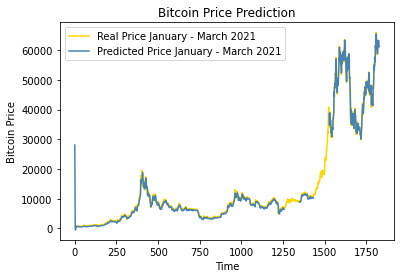

In [50]:
X_test = []
for i in range(90,inputs.size):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = '#ffd700', label = "Real Price January - March 2021")
plt.plot(predicted_stock_price, color = '#4782B4', label = "Predicted Price January - March 2021")
plt.title("Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()
